In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df =pd.read_csv("Morgan_with_all_info.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,pIC50,Col_0,Col_1,Col_2,Col_3,Col_4,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,CHEMBL1555532,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...,12055.0,inactive,4.918833,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL61559,COc1ccc(C(=O)/C=C/c2ccc(N(C)C)cc2)c(OC)c1,4712.0,inactive,5.326795,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1494120,COc1ccc(NC(=O)/C(Cl)=C(/Cl)[S+]([O-])Cc2ccc(Cl...,7828.0,inactive,5.106349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1698008,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1,11190.0,inactive,4.951170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1964993,O=[N+]([O-])c1ccc(N/N=C/C=C/c2ccco2)cc1,4186.0,inactive,5.378201,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,CHEMBL1710136,Cc1cc2[nH]c3c4ccccc4nc(C)c3c2cc1C,23631.0,inactive,4.626518,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,CHEMBL1333510,O=C(Nc1ccccc1)c1nnsc1S(=O)(=O)c1ccc(Cl)cc1,18824.0,inactive,4.725288,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,CHEMBL509617,CC1CC(C)(O)CC(C(O)CC2CC(=O)NC(=O)C2)C1=O,49685.0,inactive,4.303775,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,CHEMBL1508121,O=C1C=C(c2ccccc2)C(=O)N1Nc1ccccc1,18676.0,inactive,4.728716,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = df.drop(['pIC50','canonical_smiles', 'standard_value', 'bioactivity_class'], axis=1)
Y = df.pIC50
X

,molecule_chembl_id,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,CHEMBL1555532,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL61559,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1494120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1698008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1964993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,CHEMBL1710136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,CHEMBL1333510,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,CHEMBL509617,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,CHEMBL1508121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.feature_selection import VarianceThreshold

sele = VarianceThreshold(threshold = 0) 
sele.fit(X.iloc[:, 1:])
sele.get_support()

concol = [column for column in X.iloc[:, 1:].columns 
          if column not in X.iloc[:, 1:].columns[sele.get_support()]]
selected_X = X.drop(concol,axis=1)
selected_X

,molecule_chembl_id,Col_1,Col_2,Col_3,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,CHEMBL1555532,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL61559,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1494120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1698008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1964993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,CHEMBL1710136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,CHEMBL1333510,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,CHEMBL509617,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,CHEMBL1508121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
selected_X.iloc[:, 1:].to_csv('descriptor_list.csv', index = False)

In [28]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(selected_X.iloc[:, 1:], Y)
r2 = model.score(selected_X.iloc[:, 1:], Y)
r2

0.8976338039528451

In [29]:
Y_pred = model.predict(selected_X.iloc[:, 1:])
Y_pred

array([4.89963308, 5.26637566, 4.95754876, 4.85910326, 5.27313091,
       5.17172006, 4.60353437, 5.09463904, 5.11544004, 4.48150123,
       5.19162979, 5.29595996, 4.45075217, 5.11726705, 5.08402667,
       5.00258221, 5.11060009, 5.03793269, 5.03533848, 4.4922022 ,
       5.28196264, 5.15846052, 5.07821396, 5.19529292, 4.97786964,
       5.14521778, 4.79808308, 4.99781347, 4.93319326, 5.27665441,
       4.99862142, 4.77494245, 4.31994407, 4.84555244, 4.75345494,
       4.54308014, 5.26681102, 5.19366412, 4.97302867, 4.33940084,
       4.95535448, 5.1612509 , 5.27100057, 5.012241  , 4.53136494,
       5.25575398, 5.09130035, 5.24701259, 4.82786588, 5.4715461 ,
       5.39581894, 5.21883123, 5.08112403, 5.24623272, 5.12253347,
       4.68351324, 5.08694374, 5.42537306, 5.27969428, 5.13696394,
       5.18963917, 4.48875343, 5.42201056, 5.06578571, 5.3798769 ,
       4.97130384, 5.00982436, 5.26947851, 5.28832685, 4.72769715,
       5.25773083, 5.27675048, 5.18428058, 5.21970889, 5.08129

In [33]:
selected_X['Y_pred'] = Y_pred.tolist()
selected_X

,molecule_chembl_id,Col_1,Col_2,Col_3,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,Y_pred
0,CHEMBL1555532,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.899633
1,CHEMBL61559,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.266376
2,CHEMBL1494120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.957549
3,CHEMBL1698008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.859103
4,CHEMBL1964993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.273131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,CHEMBL1710136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.830421
499,CHEMBL1333510,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.775710
500,CHEMBL509617,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.504600
501,CHEMBL1508121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.722870


In [38]:
	selected_X.nlargest(5,'Y_pred')

,molecule_chembl_id,Col_1,Col_2,Col_3,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,Y_pred
330,CHEMBL1578600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.512887
375,CHEMBL1492629,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.129756
402,CHEMBL3196939,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.114875
363,CHEMBL1573007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.070978
444,CHEMBL1328892,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.032744


In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.03
Coefficient of determination (R^2): 0.90


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

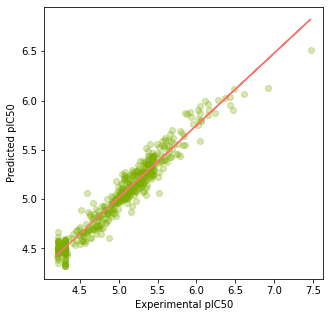

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('beta_lactamase_model.pkl', 'wb'))